In [4]:
import numpy as np
import scipy as scp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

DEBUG = False

%matplotlib inline
%pylab inline
pylab.rcParams['figure.figsize'] = (16.0, 8.0)

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
data_xvals = np.atleast_2d( [ 1.0, 3.0, 5.0, 6.0, 7.0, 8.0 ] )
data_yvals = np.sin( data_xvals )

In [6]:
data_xvals

array([[ 1.,  3.,  5.,  6.,  7.,  8.]])

In [7]:
data_yvals

array([[ 0.84147098,  0.14112001, -0.95892427, -0.2794155 ,  0.6569866 ,
         0.98935825]])

# Setting up Kernel Functions

In [8]:

"""  Linear Kernel  """
def linear_kernel(x1, x2):
    #  TODO: might not be correct
    return float(x1) * float(x2)


"""  Gaussian Kernel  """
def gaussian_kernel(x1, x2):
    kernel_width = 0.5
    return math.pow(math.e, (-1.0 * kernel_width * math.pow((float(x1) - float(x2)), 2.0)))

"""  Polynomial Kernel  """
def polynomial_kernel(x1, x2):
    degree = 3.0
    return math.pow((1.0 + (float(x1) * float(x2))), degree)



In [9]:
class Gaussian_Process_Regression_Model():
    def __init__(self, x_train, y_train, kernel_func):
        self.sigma2 = 0.002
        self.x_train = x_train
        self.y_train = y_train
        self.cv_matrix_x_x = np.zeros((len(x_train[0]), len(x_train[0])))
        self.cv_matrix_x_xtest = np.zeros((len(x_train[0]), 1))
        self.cv_xtest_xtest = np.zeros((1,1))
        self.kernel_func = kernel_func  #  this is a function pointer
        
        self.__initialize_cv_with_train_data()
        
                
    def __add_noise(self, x1, x2):
        return self.sigma2 if x1 == x2 else 0.0
    
    def __add_noise_to_entire_matrix(self, x_test):
        for i in range(len(self.x_train[0])):
            for j in range(len(self.x_train[0])):
                 self.cv_matrix_x_x[i][j] += self.__add_noise(self.x_train[0][i], self.x_train[0][j])
                
        for i in range(len(self.x_train[0])):
            self.cv_matrix_x_xtest[i][0] += self.__add_noise(self.x_train[0][i], x_test)
            
        self.cv_xtest_xtest += self.__add_noise(x_test, x_test)
    
    
    
    
    
    def  __initialize_cv_with_train_data(self):
        for i in range(len(self.x_train[0])):
            for j in range(len(self.x_train[0])):
                self.cv_matrix_x_x[i][j] = self.kernel_func(self.x_train[0][i], self.x_train[0][j])
    
    
    
    
    """  Takes the x_test point, creates a covariance matrix with it and the training data, 
    then calculates and returns the mean and variance  """
    def __predict(self, x_test, noise):
#         print(self.cv_matrix_x_x)
        
        self.cv_xtest_xtest[0][0] = self.kernel_func(x_test, x_test)
        
        for i in range(len(self.x_train[0])):
            self.cv_matrix_x_xtest[i][0] = self.kernel_func(self.x_train[0][i], x_test)
        
        
        if noise:
            self.__add_noise_to_entire_matrix(x_test)
        
        
#         if DEBUG:
#             print("x,xtest before: ",self.cv_matrix_x_xtest)
#             print("x, x before: ",self.cv_matrix_x_x)
        mid_matrix = np.dot(self.cv_matrix_x_xtest.T, np.linalg.pinv(self.cv_matrix_x_x))
#         if DEBUG:
#             print("x, xtest after: ", self.cv_matrix_x_xtest)
#             print("x,x after: ",self.cv_matrix_x_x)
#             print("mid: ", mid_matrix)


        u = np.dot(mid_matrix, self.y_train.T)
        sigma = self.cv_xtest_xtest - np.dot(mid_matrix, self.cv_matrix_x_xtest)
               
            
#         if DEBUG:
#             print("mid: ", mid_matrix)
#             print("y_train: ", self.y_train.T)
#             print("xtest, xtest: ", self.cv_xtest_xtest)
#             print('x, xtest: ', self.cv_matrix_x_xtest)
#             print("u: ", u)
#             print("Sigma: ", sigma)
        return (u[0][0], sigma[0][0])
        
        #  this returns the mean and the variance
#         return (self.kernel_func(x_test, 1.0), 1.0)




    def graph_regression(self, noise, title):
        
        #  TODO:  then need to make sure 
        x_list = []
        y_list = []
        positive_error = []
        negative_error = []
        for x in np.linspace(-2.0,10.0,30 * 12 + 1):
            (y, variance) = self.__predict(x, noise)
            x_list.append(x)
            y_list.append(y)
            positive_error.append(y + variance)
            negative_error.append(y - variance)
        
        plt.scatter(x_list, y_list)
        mean_line = plt.scatter(self.x_train, self.y_train)
        variance_line = plt.gca().fill_between(x_list, positive_error, negative_error, color='#e19eff', alpha=0.5)
        plt.figlegend(labels=('Mean', 'Variance'), handles=(mean_line, variance_line), loc=1, fontsize=20)
        plt.suptitle( title, fontsize=30)

In [10]:
#  THIS IS COOL, USE THIS FOR FLOAT RANGES: np.linspace(-2.0,10.0,10 * 12 + 1)

# The Gaussian

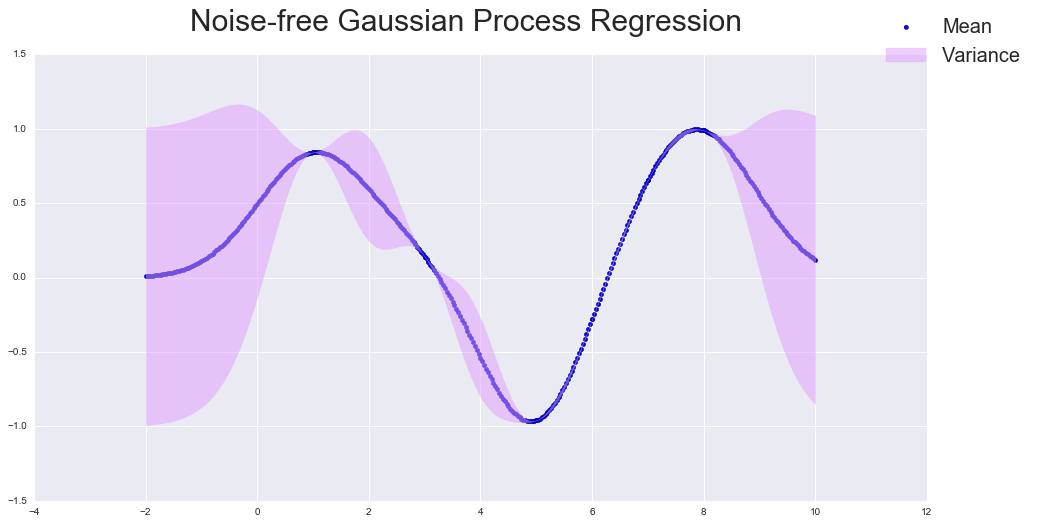

In [11]:
# %pdb
tmp = Gaussian_Process_Regression_Model(data_xvals, data_yvals, gaussian_kernel)
tmp.graph_regression(False, 'Noise-free Gaussian Process Regression')

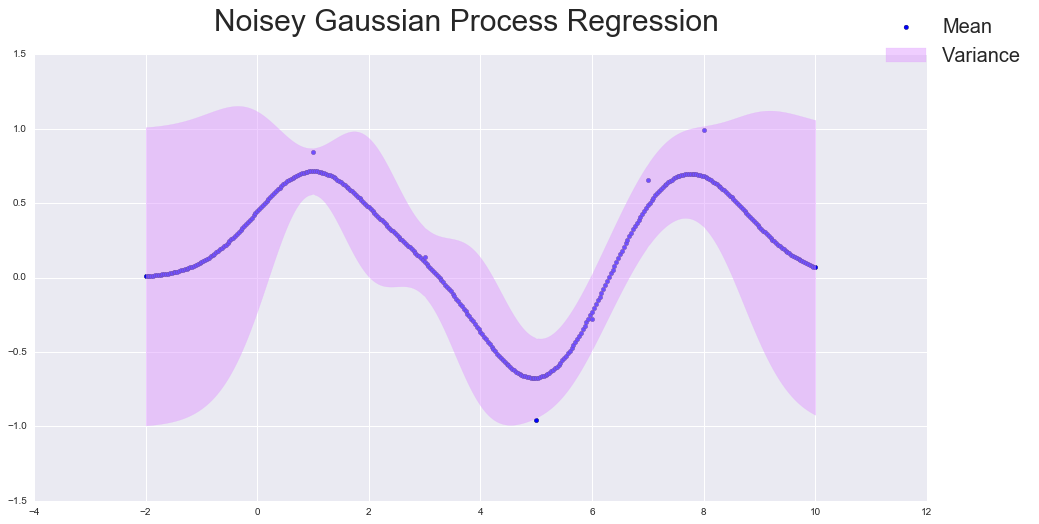

In [122]:
tmp.graph_regression(True, 'Noisey Gaussian Process Regression')

# The Linear Kernel

In [127]:
tmp = Gaussian_Process_Regression_Model(data_xvals, data_yvals, linear_kernel)


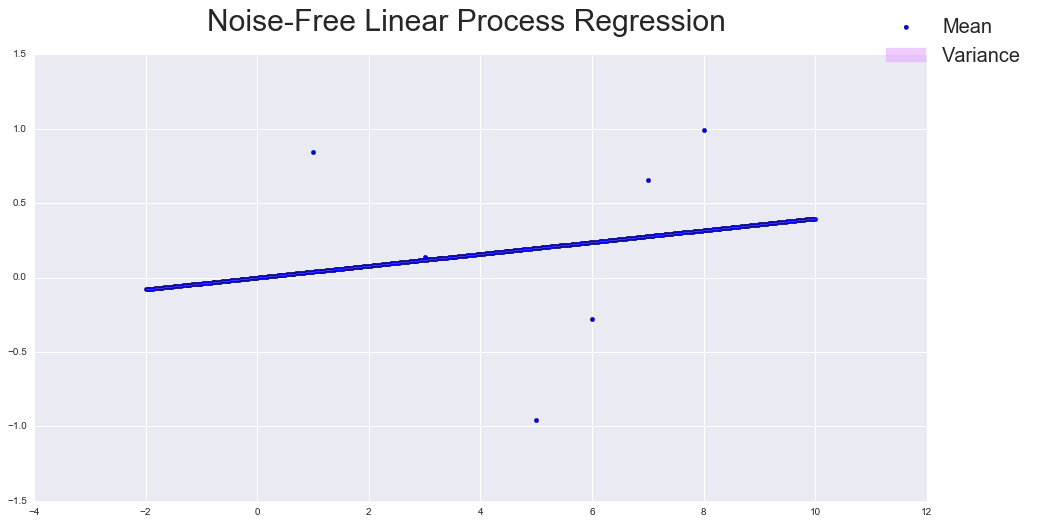

In [128]:
tmp.graph_regression(False, 'Noise-Free Linear Process Regression')

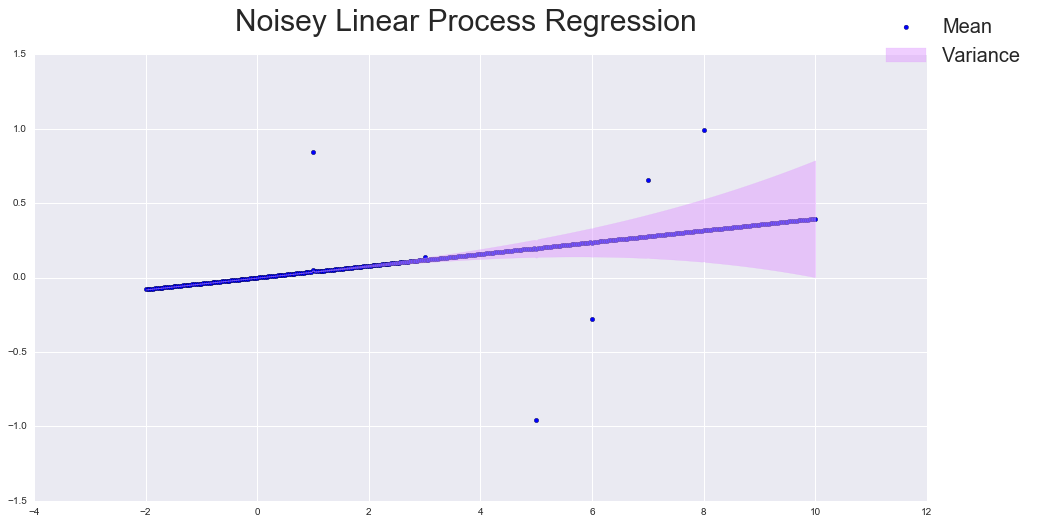

In [124]:
tmp.graph_regression(True, 'Noisey Linear Process Regression')

# The Polynomial Kernel

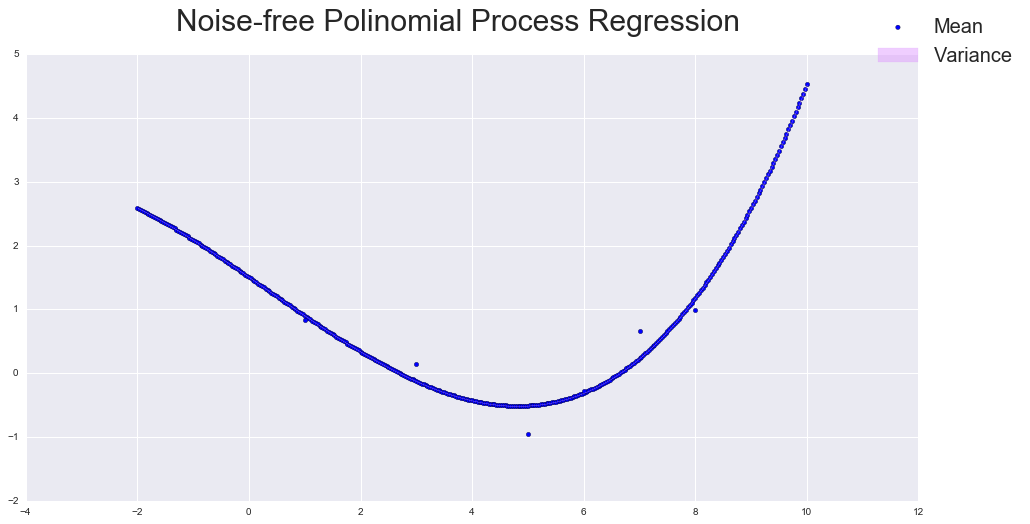

In [125]:
tmp = Gaussian_Process_Regression_Model(data_xvals, data_yvals, polynomial_kernel)
tmp.graph_regression(False, 'Noise-free Polinomial Process Regression')

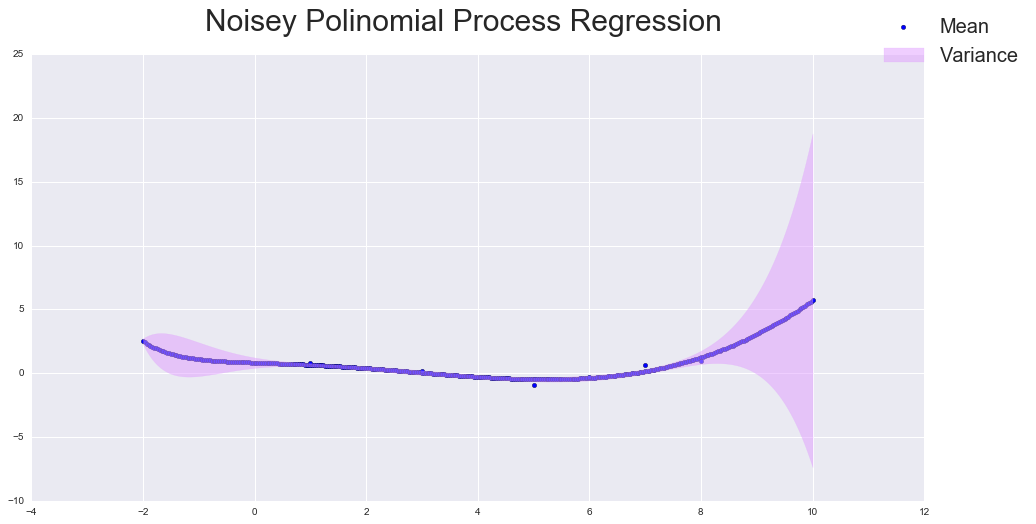

In [126]:
tmp.graph_regression(True, 'Noisey Polinomial Process Regression')

#1 When the Gaussian bandwidth gets too large it starts modeling a very complicated fit and overfits the data badly. When the bandwidth is too small it puts too much confidence in the points themselves so that there is little to no variance near the poinnts but there is a large amount of variance a ways from the given training points.

#2 When the degree gets very large the graph gets additional bends in the fit line, the variance also starts to grow very fast near the end of the plot. Degree 1 polynomial becomes the linear kernel. Less than one the kernel starts generating complex numbers. 